In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process

/kaggle/input/recruitment-task/sample_submission.csv
/kaggle/input/recruitment-task/train.csv
/kaggle/input/recruitment-task/test.csv


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Data Uploading

In [2]:
df=pd.read_csv('/kaggle/input/recruitment-task/train.csv')

In [3]:
df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


it seems like columns seem to have manhy incorrect values which need to be delt with first to prevent data integrity problem as  invalid values  can cause more significant issues in analysis or modeling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [5]:
df.duplicated().sum()

0

# Data Exploration and Cleaning: Identifying Unique Values and Removing Irrelevant values

In [6]:
df['Brand'].unique()

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

In [7]:
df['Brand'] = df['Brand'].str.lower()
df['Brand'] = df['Brand'].apply(lambda x: re.sub(r'\b(i love|the best|is)\b', '', str(x).lower()).strip())
df['Brand'] = df['Brand'].apply(
    lambda x: re.sub(
        r"[^\x00-\x7F]+",  # This regex pattern matches any non-ASCII character
        '',
        str(x)
    ).strip()
)


In [8]:
df['Brand'].unique()

array(['nan', 'toyota', 'hyundai', 'opel', 'subaru', 'volkswagen', 'ford',
       'bmw', 'jaguar', 'honda', 'mercedes-benz', 'nissan', 'lexus',
       'ssangyong', 'kia', 'daewoo', 'audi', 'chevrolet', 'jeep',
       'porsche', 'mazda', 'mitsubishi', 'gmc', 'skoda', 'suzuki', 'fiat',
       'peugeot', 'dodge', 'mini', 'vaz', 'gaz', 'cadillac', 'uaz',
       'seat', 'rover', 'chrysler', 'land rover', 'infiniti', '',
       'alfa romeo', 'renault', 'greatwall', 'buick', 'volvo', 'lincoln',
       'isuzu', 'scion', 'rolls-royce', 'citroen', 'pontiac', 'acura',
       'daihatsu', 'moskvich', 'mercury', 'maserati'], dtype=object)

In [9]:
df['VehicleModel'].nunique()


1480

In [10]:
df['VehicleModel'] = df['VehicleModel'].str.lower()
df['VehicleModel'] = df['VehicleModel'].apply(
    lambda x: re.sub(
        r"\b(i have the fastest model ever.. yes you got it right it's|i own|my model which is|is the best|.)\b", 
        '',
        str(x)).strip())

df['VehicleModel'] = df['VehicleModel'].apply(lambda x: x.rstrip('.').strip())
df['VehicleModel'] = df['VehicleModel'].apply(
    lambda x: re.sub(
        r"[^\x00-\x7F]+",  
        '',
        str(x)
    ).strip()
)


In [11]:
 df['VehicleModel'].unique()

array(['mazdatouring', 'nan', 'h1', 'corsa', 'outback', 'cc', '200',
       'f150', 'x6', 'xj', 'fit', 'maxsel', 'elantra', 'presagerider',
       'prius', 'golfgti', 'transit100ld', 'actyon', 'astra', 'focus',
       'aqua', 'insight', 'rx450', 'camry', 'sonata', 'highlander', '330',
       '270', 'corolla', '350', 'rexton', '250', 'foresterbean',
       'santafe', 'focusflexfuel', 'camryhybrid', 'pathfinder', 'optima',
       'mazda', 'escape', '220', 'optimahybid', 'altima', 'vito',
       'fiesta', '335', 'rs7', 'korando', 'vectra', '328', 'x5', 'volt',
       'forester', 'odyssey', 'gla250', 'tucson', 'march', 'zafira',
       'elantragt', 'cayenne', 'rav', '616', 'tiida', '240',
       'tucsonlimited', '528', 'rx400', 'captiva', 'elysion', 'h1starixs',
       'delica', 'note', 'ml350', '320', 'fusion', 'orlando', 'gx470',
       'terra', 'jetta', 'aveo', 'cx', 'transit', 'juke', 'gle63amg',
       'sorento', '520', 'jukejuke', 'landcruiserprado', 'yukon', 'ls460',
       'airtrek

In [12]:
df['Type'].unique()

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [13]:
df['Type'] = df['Type'].str.replace(r'\d+', '', regex=True).str.strip()
df['Type'] = df['Type'].str.lower()
df['Type'] = df['Type'].str.replace(r'\bwoow\b', '', regex=True).str.strip()

In [14]:
df['Type'].unique()

array(['sedan', 'minivan', 'hatchback', 'pickup', 'jeep', 'microbus', nan,
       'coupe', 'universal', 'goods wagon', 'cabriolet', 'limousine'],
      dtype=object)

In [15]:
df['color'] = df['color'].str.lower()
df['color'].unique()

array([nan, 'metallic', 'jet black', 'sapphire blue', 'pearl white',
       'charcoal', 'gold', 'crimson', 'tangerine', 'sand',
       'emerald green', 'lemon yellow', 'chocolate', 'sky blue',
       'ruby red', 'rose pink', 'royal purple'], dtype=object)

In [16]:
df["Duty"].unique()

array(['I had to pay a substantial $1249 levy on my new car purchase.',
       '-', '1185$', ..., '2909$',
       'The car levy amounted is 893 per vehicle.', '965'], dtype=object)

In [17]:
df['Duty'] = df['Duty'].str.replace(r'[^\d.]', '', regex=True)  
df['Duty'] = pd.to_numeric(df['Duty'], errors='coerce')        


In [18]:
df['fuel'].unique()

array(['Gas', 'Dies', nan, 'Electric Hybrid', 'other', 'Natural Gas',
       'hyb', 'others'], dtype=object)

In [19]:
valid_fuel_types = ['gasoline', 'diesel', 'electric', 'hybrid', 'other']


df['fuel'] = df['fuel'].str.strip().str.lower()

def get_best_match(fuel_type):
    if isinstance(fuel_type, str):
        match = process.extractOne(fuel_type, valid_fuel_types)
        if match[1] >= 80:  # Match threshold
            return match[0]
        else:
            return 'unknown'
    return 'unknown'

df['fuel'] = df['fuel'].apply(get_best_match)

In [20]:
df['fuel'].unique()

array(['gasoline', 'diesel', 'unknown', 'electric', 'other', 'hybrid'],
      dtype=object)

In [21]:
df['CylinderCount'] = df['CylinderCount'].str.extract('(\d+)')  
df['CylinderCount'] = pd.to_numeric(df['CylinderCount'], errors='coerce')

In [22]:
df['CylinderCount'].unique()

array([ 4,  8,  6, 14,  0,  5, 16, 18,  3, 15, 10, 11,  2,  9,  1, 12, 13,
        7])

In [23]:
df['type of gear'].unique()

array(['R', 'auto', nan, 'manual', 'others', 'MANUAL', 'AUTO', 'gear'],
      dtype=object)

In [24]:
valid_gear_types = ['automatic', 'manual', 'unknown', 'reverse']


df['type of gear'] = df['type of gear'].str.lower()

df['type of gear'] = df['type of gear'].replace({
    'auto': 'automatic',
    'manual': 'manual',
    'others': 'unknown',
    'gear': 'unknown',
    'r': 'reverse'
})

# Function to get the best match for the gear type
def get_best_gear_match(gear_type):
    if isinstance(gear_type, str):
        match = process.extractOne(gear_type, valid_gear_types)
        if match and match[1] >= 80:  # Match threshold
            return match[0]
        else:
            return 'unknown'
    return 'unknown'


df['type of gear'] = df['type of gear'].apply(get_best_gear_match)

In [25]:
df['type of gear'].unique()

array(['reverse', 'automatic', 'unknown', 'manual'], dtype=object)

In [26]:
df['capacity'].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [27]:
df['Odometer'].unique()

array(['75492 KM', '220000 KM', 'TOTAL 50653 km', ..., '156802  kilo',
       '314373 KM', '131627'], dtype=object)

In [28]:
df['Odometer'] = df['Odometer'].str.extract('(\d+\.\d+|\d+)') 
df['Odometer'] = pd.to_numeric(df['Odometer'], errors='coerce')

In [29]:
df['Odometer'].unique()

array([ 75492, 220000,  50653, ..., 451117, 156802, 131627])

In [30]:
df['#airbags'].unique()

array(['1008', '-96', '4 count', '0  ', '4  ', '12', '6 count', '8', '4',
       '12,', '6~', '106', '6', '2', '8 bags', '12<', '0',
       'ONLY 10 AIRBAG', '12 count', 'ONLY 4 AIRBAG', '1012', '10',
       '12 bags', '4 bags', 'ONLY 8 AIRBAG', '5', '8 count',
       'ONLY 0 AIRBAG', '12/', 'ONLY 6 AIRBAG', '12)', '-100', '8=',
       'ONLY 12 AIRBAG', '12  ', '108', '4<', '-94', '12|', '6 bags',
       '2 count', '12`', '4]', '8$', '-88', '10 count', '6  ', '12>',
       '112', '6(', '11', '110', '4@', '4&', '0 count', '4{', '4#', '104',
       '1005', '12~', '4!', '2  ', '5 count', '16 bags', '6?', '1', '-92',
       '100', '1004', '9', '14', '4$', '4,', '12!', '8  ', '-90', '12&',
       '6/', '1 count', 'ONLY 2 AIRBAG', '0~', "8'", '2 bags', '4[',
       '10 bags', '8&', '0 bags', '12#', "4'", '2<', '0#', "0'", '13',
       '2(', '2*', '4"', '4(', '0-', '8:', '2,', '8@', 'ONLY 5 AIRBAG',
       '-98', '4_', '0"', '0[', '10  ', '7', '12}', '1002', '6"', '6_',
       '6:', '4;', '10

In [31]:
df['#airbags'] = df['#airbags'].str.extract('(\d+\.\d+|\d+)') 
df['#airbags'] = pd.to_numeric(df['#airbags'], errors='coerce')

In [32]:
df['#airbags'].unique()

array([1008,   96,    4,    0,   12,    6,    8,  106,    2,   10, 1012,
          5,  100,  108,   94,   88,  112,   11,  110,  104, 1005,   16,
          1,   92, 1004,    9,   14,   90,   13,   98,    7, 1002, 1000,
        105, 1010, 1007,  116,    3,  102,   99, 1006, 1016,   15,  101,
        111,   97,  107,  109,   95])

In [33]:
df['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

In [34]:
df['ManufacturingYear'] = df['ManufacturingYear'].str.extract(r'(\b19\d{2}\b|\b20\d{2}\b)')

In [35]:
df['ManufacturingYear'] = df['ManufacturingYear'].astype(float).astype('Int64')

In [36]:
df['ManufacturingYear'].unique()

<IntegerArray>
[2017, <NA>, 2009, 2007, 1999, 2012, 2011, 2014, 2015, 2006, 2013, 2010, 2003,
 2016, 1998, 2018, 2008, 2020, 2005, 2004, 1910, 1914, 2001, 1997, 1917, 1916,
 1912, 2002, 2019, 1907, 2000, 1996, 1913, 1900, 1902, 1995, 1915, 1911, 2098,
 1918, 1908, 1992, 2099, 1985, 1909, 1905, 1983, 1904, 1993, 1994, 1988, 1903,
 1982, 1987, 1991, 1990, 2097, 1939, 1919, 2096, 1901, 1986, 1920, 2089, 1984,
 1906, 2093, 1978]
Length: 68, dtype: Int64

In [37]:
df['capacity'].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [38]:
print(df['capacity'].dtype)


object


In [39]:
df['capacity_cleaned'] = df['capacity'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

df['is_turbo'] = df['capacity'].str.contains('Turbo', case=False, na=False).astype(int)

In [40]:
df.drop(columns=['capacity'],inplace=True)

# Handling missing values

In [41]:
df.isnull().mean() * 100

ID                    0.000000
Brand                 0.000000
VehicleModel          0.000000
ManufacturingYear    25.328571
Type                  9.785714
rating                9.857143
color                30.342857
Duty                 36.828571
fuel                  0.000000
CylinderCount         0.000000
type of gear          0.000000
Odometer              0.000000
#airbags              0.000000
price                 0.000000
capacity_cleaned      0.000000
is_turbo              0.000000
dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              7000 non-null   object 
 2   VehicleModel       7000 non-null   object 
 3   ManufacturingYear  5227 non-null   Int64  
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               4422 non-null   float64
 8   fuel               7000 non-null   object 
 9   CylinderCount      7000 non-null   int64  
 10  type of gear       7000 non-null   object 
 11  Odometer           7000 non-null   int64  
 12  #airbags           7000 non-null   int64  
 13  price              7000 non-null   int64  
 14  capacity_cleaned   7000 non-null   float64
 15  is_turbo           7000 non-null   int64  
dtypes: Int64(1), float64(3),

In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns


for col in categorical_cols:
    mode_value = df[col].mode()[0] 
    df[col].fillna(mode_value, inplace=True)

In [44]:
df['ManufacturingYear'] = df['ManufacturingYear'].fillna(df['ManufacturingYear'].median())

In [45]:
df['Duty'].fillna(df['Duty'].median(), inplace=True)

df['rating'].fillna(df['rating'].mean(), inplace=True)

In [46]:
df.describe()

,ID,ManufacturingYear,rating,Duty,CylinderCount,Odometer,#airbags,price,capacity_cleaned,is_turbo
count,7000.000000,7000.0,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,9022.128714,2008.102857,2.559588,1465.357571,5.028000,1.589344e+06,45.664429,14406.866429,2.037357,0.083857
std,5202.316292,18.072183,1.809118,2295.767091,3.534261,5.018431e+07,178.772417,11747.617978,1.045173,0.277193
min,1.000000,1900.0,-4.000000,87.000000,0.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000
25%,4546.750000,2010.0,1.000000,765.000000,4.000000,7.453000e+04,4.000000,5018.000000,1.600000,0.000000
50%,9044.500000,2012.0,2.559588,831.000000,4.000000,1.291280e+05,6.000000,12544.000000,2.000000,0.000000
75%,13523.250000,2013.0,4.000000,924.000000,6.000000,1.904135e+05,12.000000,20071.000000,2.500000,0.000000
max,18013.000000,2099.0,10.000000,12455.000000,18.000000,2.147484e+09,1016.000000,49889.000000,6.700000,1.000000


# data handling and feature engineering

In [47]:
df['rating'] = df['rating'].apply(lambda x: 0 if x < 0 else x)

In [48]:
df['rating'].describe()

count    7000.000000
mean        2.588874
std         1.753027
min         0.000000
25%         1.000000
50%         2.559588
75%         4.000000
max        10.000000
Name: rating, dtype: float64

In [49]:
def categorize_rating(rating):
    if rating < 3.33:
        return 'Low'
    elif rating < 6.66:
        return 'Medium'
    else:
        return 'High'

df['rating'] = df['rating'].apply(categorize_rating)

In [50]:
df['rating'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

some cars seems to have 0 cylinders which is not logical

In [51]:
median_cylinders = df['CylinderCount'].median()
df['CylinderCount'] = df['CylinderCount'].replace(0, median_cylinders)


In [52]:
df['CylinderCount'].describe()

count    7000.000000
mean        5.438286
std         3.136494
min         1.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        18.000000
Name: CylinderCount, dtype: float64

In [53]:
median_capacity= df['capacity_cleaned'].median()
median_capacity
df['capacity_cleaned'] = df['capacity_cleaned'].apply(lambda x: median_capacity if x < 1.6 else x)

In [54]:
df['capacity_cleaned'].describe()

count    7000.000000
mean        2.325857
std         0.722160
min         1.600000
25%         2.000000
50%         2.000000
75%         2.500000
max         6.700000
Name: capacity_cleaned, dtype: float64

In [55]:
df['Odometer'].max()

2147483647

not reasonable value 

In [56]:
upper_limit = 1000000
median_odometer = df['Odometer'].median()
df['Odometer'] = df['Odometer'].apply(lambda x: median_odometer if x > upper_limit else x)

In [57]:
df['Odometer'].describe()

count      7000.000000
mean     142902.576571
std      102054.971025
min           0.000000
25%       74530.000000
50%      129128.000000
75%      190000.000000
max      999999.000000
Name: Odometer, dtype: float64

### understanding if rows with 0 odometer are a mistake or just brand new

In [58]:
zero_values_rows = df[df['Odometer'] == 0]
print(zero_values_rows)


         ID          Brand VehicleModel  ManufacturingYear         Type  \
11      926          honda          fit               2006    hatchback   
51     6467  mercedes-benz          220               1998        sedan   
52     5316         subaru      outback               2018        sedan   
57    11644           ford       fiesta               2015        sedan   
80    16676         toyota        prius               2007    hatchback   
...     ...            ...          ...                ...          ...   
6914   4751         toyota        prius               2012    hatchback   
6927   4568           opel        astra               1996  goods wagon   
6930   2064     mitsubishi          nan               2012        sedan   
6954  12166        hyundai          nan               2013        sedan   
6967  11891          lexus        gx470               2012         jeep   

      rating          color    Duty      fuel  CylinderCount type of gear  \
11       Low       met

In [59]:
median_odometer = df['Odometer'].median()
df['Odometer'] = df['Odometer'].replace(0.0, median_odometer)


In [60]:
df['#airbags'] = df['#airbags'].apply(lambda x: 16 if x > 16 else x)

In [61]:
median_airbags = df['#airbags'].median()
df['#airbags'] = df['#airbags'].replace(0, median_airbags)


In [62]:
df['#airbags'].describe()

count    7000.000000
mean        8.195286
std         4.263034
min         1.000000
25%         4.000000
50%         6.000000
75%        12.000000
max        16.000000
Name: #airbags, dtype: float64

## new features

In [63]:
df['VehicleAge'] = 2014 - df['ManufacturingYear']

In [64]:

df['CapacityPerCylinder'] = df['capacity_cleaned'] / df['CylinderCount']
df['UsageIntensity'] = df['Odometer'] / (df['VehicleAge'] + 1)
df['Duty_per_cylinder'] = df['Duty'] / df['CylinderCount']
df['Capacity_Odometer'] = df['capacity_cleaned'] * df['Odometer']

In [65]:
df.drop(columns=['ManufacturingYear'], inplace=True)

In [66]:
df.describe()

,ID,Duty,CylinderCount,Odometer,#airbags,price,capacity_cleaned,is_turbo,VehicleAge,CapacityPerCylinder,UsageIntensity,Duty_per_cylinder,Capacity_Odometer
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.000000,7000.0,7000.000000,7.000000e+03
mean,9022.128714,1465.357571,5.438286,147643.418857,8.195286,14406.866429,2.325857,0.083857,5.897143,0.488473,inf,318.207269,3.522670e+05
std,5202.316292,2295.767091,3.136494,98233.652657,4.263034,11747.617978,0.722160,0.277193,18.072183,0.161877,<NA>,533.175504,2.745692e+05
min,1.000000,87.000000,1.000000,18.000000,1.000000,3.000000,1.600000,0.000000,-85.0,0.100000,-689476.0,6.214286,2.880000e+01
25%,4546.750000,765.000000,4.000000,85000.000000,4.000000,5018.000000,2.000000,0.000000,1.0,0.450000,13332.0625,145.750000,1.760000e+05
50%,9044.500000,831.000000,4.000000,129128.000000,6.000000,12544.000000,2.000000,0.000000,2.0,0.500000,34666.666667,203.300000,2.827550e+05
75%,13523.250000,924.000000,6.000000,190000.000000,12.000000,20071.000000,2.500000,0.000000,4.0,0.575000,63494.0,207.750000,4.500000e+05
max,18013.000000,12455.000000,18.000000,999999.000000,16.000000,49889.000000,6.700000,1.000000,114.0,3.200000,inf,3120.666667,2.505600e+06


In [67]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                           ID      Duty  CylinderCount  Odometer  #airbags  \
ID                   1.000000  0.014976      -0.001507 -0.016781  0.001148   
Duty                 0.014976  1.000000      -0.011267 -0.002944  0.041493   
CylinderCount       -0.001507 -0.011267       1.000000  0.028894  0.054602   
Odometer            -0.016781 -0.002944       0.028894  1.000000 -0.015258   
#airbags             0.001148  0.041493       0.054602 -0.015258  1.000000   
price               -0.004050 -0.010793      -0.010398 -0.211230 -0.133919   
capacity_cleaned    -0.011064  0.065209       0.237920  0.125045  0.231333   
is_turbo             0.004757 -0.036166      -0.004975  0.003209  0.008266   
VehicleAge           0.003863 -0.044541       0.000725  0.049341 -0.031530   
CapacityPerCylinder -0.013608  0.041135      -0.651226  0.034781  0.070739   
UsageIntensity      -0.000639  0.007180       0.010942  0.337423  0.064908   
Duty_per_cylinder    0.013061  0.956984      -0.158573 -0.017400

### Droping Redundant Features with high correlation


In [68]:
columns_to_drop = ['Capacity_Odometer', 'Duty_per_cylinder']
df.drop(columns=columns_to_drop,inplace=True)

### understanding if price column skewness have great effect on the model performance or not
### >> after comparing mae between model performance on rice and price_log it seems like there is no difference

In [69]:
skewness = df['price'].skew()
print(f"Skewness: {skewness}")


Skewness: 0.9026992791680684


In [70]:
df['price_log'] = np.log1p(df['price'])
print(f"Skewness after transformation: {df['price_log'].skew()}")


Skewness after transformation: -1.4981956231614135


In [71]:
df.drop(columns='price_log',inplace=True)

In [72]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


df['CapacityPerCylinder'].fillna(df['CapacityPerCylinder'].median(), inplace=True)
df['UsageIntensity'].fillna(df['UsageIntensity'].median(), inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7000 non-null   int64  
 1   Brand                7000 non-null   object 
 2   VehicleModel         7000 non-null   object 
 3   Type                 7000 non-null   object 
 4   rating               7000 non-null   object 
 5   color                7000 non-null   object 
 6   Duty                 7000 non-null   float64
 7   fuel                 7000 non-null   object 
 8   CylinderCount        7000 non-null   int64  
 9   type of gear         7000 non-null   object 
 10  Odometer             7000 non-null   float64
 11  #airbags             7000 non-null   int64  
 12  price                7000 non-null   int64  
 13  capacity_cleaned     7000 non-null   float64
 14  is_turbo             7000 non-null   int64  
 15  VehicleAge           7000 non-null   I

# Visualizations

In [75]:
df_top_10_no_nan =  df[df['Brand'] != 'nan']

top_10_brands = df_top_10_no_nan['Brand'].value_counts().head(10).index

df_top_10 = df_top_10_no_nan[df_top_10_no_nan['Brand'].isin(top_10_brands)]

## How price varies across different brands

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota'),
  Text(1, 0, 'hyundai'),
  Text(2, 0, 'volkswagen'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'mercedes-benz'),
  Text(7, 0, 'nissan'),
  Text(8, 0, 'lexus'),
  Text(9, 0, 'chevrolet')])

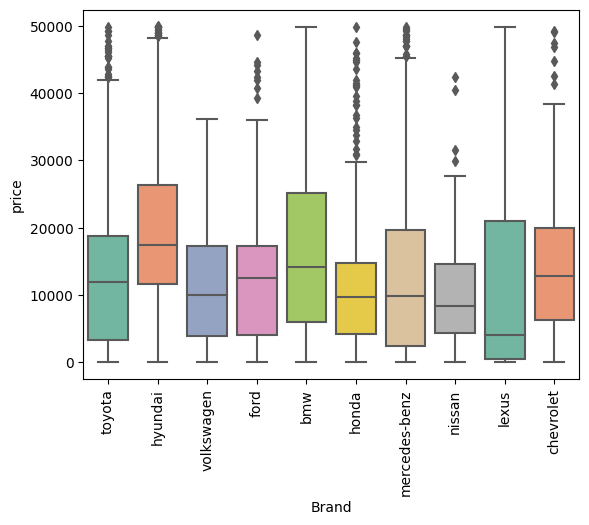

In [76]:
sns.boxplot(data=df_top_10, x='Brand', y='price', palette='Set2')
plt.xticks(rotation=90)

### BMW shows the highest median price among all brands
### Hyundai shows one of the largest price spreads (box size), indicating diverse pricing across their models
### Most brands have median prices between 10,000-20,000
### Almost all brands have luxury/high-end models shown as outlier points above 40,000


### How prices vary baed on turbo engines

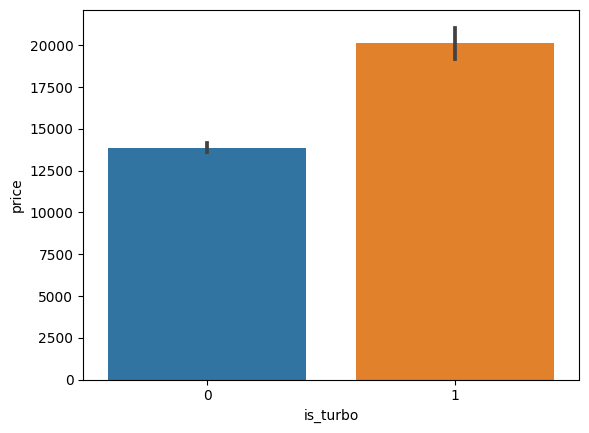

In [77]:
sns.barplot(x='is_turbo', y='price', data=df)
plt.show()


### Most Popular Brands

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

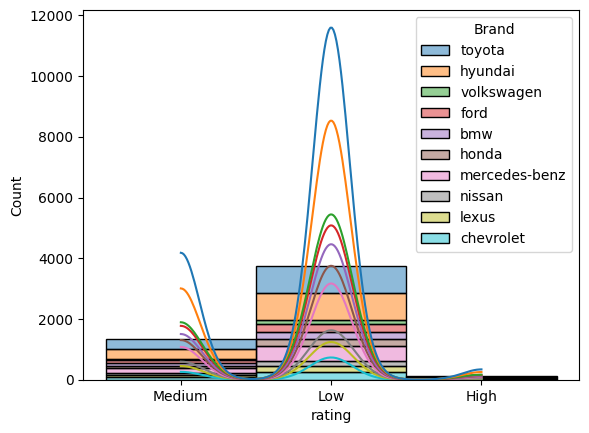

In [78]:

sns.histplot(df_top_10, x='rating', hue='Brand', kde=True, multiple='stack', bins=20)

### Most vehicles across all brands have "Low" ratings
### Toyota has the highest count of vehicles overall
### High" ratings are relatively rare across all brands
### Hyundai and Toyota dominate the "Medium" rating category

## How does the number of cylinders affect the price?

<Axes: xlabel='CylinderCount', ylabel='price'>

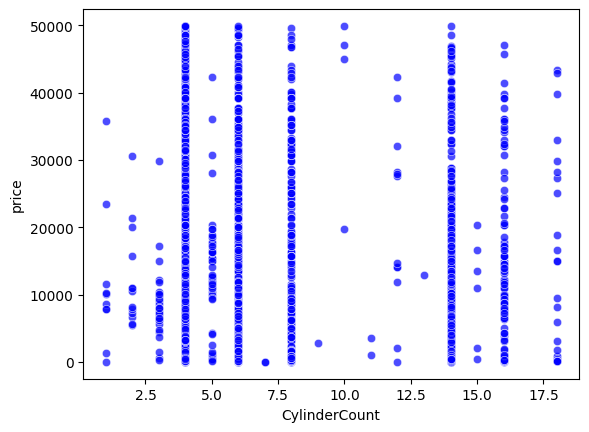

In [79]:
sns.scatterplot(data=df, x='CylinderCount', y='price', color='blue', alpha=0.7)

### Most vehicles cluster between 4-8 cylinders
### Higher cylinder counts (12+) tend to have higher price points
### There's a general positive correlation between cylinder count and price

## Which fuel type is the most common?

<Axes: ylabel='count'>

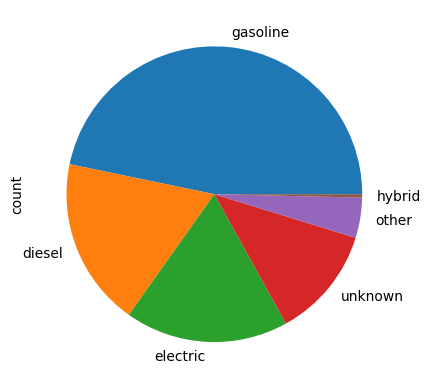

In [80]:
fuel_counts = df['fuel'].value_counts()
fuel_counts.plot.pie()

## What is the average duty across different brands? 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota'),
  Text(1, 0, 'hyundai'),
  Text(2, 0, 'volkswagen'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'mercedes-benz'),
  Text(7, 0, 'nissan'),
  Text(8, 0, 'lexus'),
  Text(9, 0, 'chevrolet')])

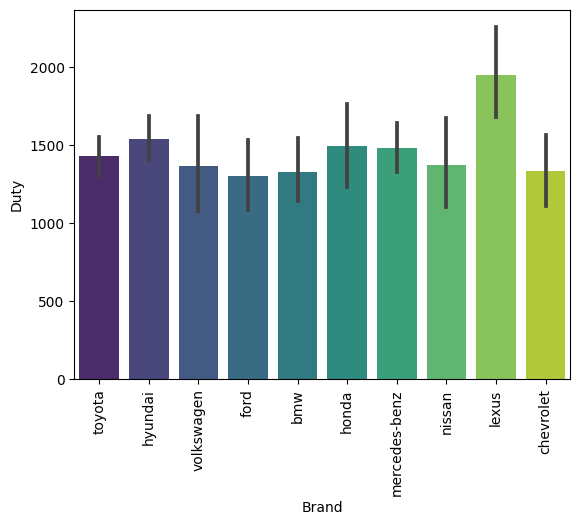

In [81]:
sns.barplot(data=df_top_10, x='Brand', y='Duty', estimator='mean', palette='viridis')
plt.xticks(rotation=90)

### Lexus has the highest average duty (~1900)
### Most brands have duty values between 1200-1500
### Chevrolet has relatively lower duty compared to other brands

# Model evaluation

In [82]:
from sklearn.preprocessing import RobustScaler , OneHotEncoder , MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score


## Voting model

In [85]:
target = 'price'

features = df.drop(columns=['price','ID'])

categorical_cols = features.select_dtypes(include=['object']).columns

numerical_cols = features.select_dtypes(exclude=['object']).columns

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler',  MinMaxScaler())  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])
lgb_model = lgb.LGBMRegressor()
xgb_model = XGBRegressor(eval_metric='mae', use_label_encoder=False)
svr_model = SVR()


voting_model = VotingRegressor(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model), ('svr', svr_model)]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', voting_model)  
])
X = features


y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1170
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 118
[LightGBM] [Info] Start training from score 14369.717857
Mean Absolute Error: 6361.701998877899


## Lightgbm with PolynomialFeatures

In [86]:
from sklearn.preprocessing import PolynomialFeatures , LabelEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with mean
            ('scaler',  MinMaxScaler()),  # Scale numerical features
            ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial features
        ]), numerical_cols),  
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
            ('one-hot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encoding
        ]), categorical_cols)  
    ]
)


pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',lgb_model)  
])
pipeline2.fit(X_train, y_train)

y_pred = pipeline2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8727
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 159
[LightGBM] [Info] Start training from score 14369.717857
Mean Absolute Error: 5635.768264269923


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### cross validation 

In [87]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


cv = KFold(n_splits=5, shuffle=True, random_state=42)  


mae_scores = cross_val_score(pipeline2, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')


mae_scores = -mae_scores


print(f"Cross-validated MAE scores: {mae_scores}")
print(f"Mean of MAE scores: {np.mean(mae_scores)}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8470
[LightGBM] [Info] Number of data points in the train set: 4480, number of used features: 145
[LightGBM] [Info] Start training from score 14388.805134


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8527
[LightGBM] [Info] Number of data points in the train set: 4480, number of used features: 146
[LightGBM] [Info] Start training from score 14331.225446


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8487
[LightGBM] [Info] Number of data points in the train set: 4480, number of used features: 143
[LightGBM] [Info] Start training from score 14341.160714


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8477
[LightGBM] [Info] Number of data points in the train set: 4480, number of used features: 143
[LightGBM] [Info] Start training from score 14366.927679


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8488
[LightGBM] [Info] Number of data points in the train set: 4480, number of used features: 142
[LightGBM] [Info] Start training from score 14420.470312
Cross-validated MAE scores: [6115.0781159  6202.79211071 5957.47355541 6210.73872495 6553.88115033]
Mean of MAE scores: 6207.992731460827


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Hyperparameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

categorical_cols = features.select_dtypes(include=['object']).columns
numerical_cols = features.select_dtypes(exclude=['object']).columns

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore')) ,
    
    
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler',MinMaxScaler())  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model',lgb.LGBMRegressor())
])


param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1650
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 358
[LightGBM] [Info] Start training from score 14369.717857
Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 

# Submission file

In [93]:
test_df = pd.read_csv('/kaggle/input/recruitment-task/test.csv')
test_df['Brand'] = test_df['Brand'].str.lower()
test_df['Brand'] = test_df['Brand'].apply(lambda x: re.sub(r'\b(i love|the best|is)\b', '', str(x).lower()).strip())
test_df['Brand'] = test_df['Brand'].apply(lambda x: re.sub(r"[^\x00-\x7F]+", '', str(x)).strip())

# VehicleModel column
test_df['VehicleModel'] = test_df['VehicleModel'].str.lower()
test_df['VehicleModel'] = test_df['VehicleModel'].apply(lambda x: re.sub(r"\b(i have the fastest model ever.. yes you got it right it's|i own|my model which is|is the best|.)\b", '', str(x)).strip())
test_df['VehicleModel'] = test_df['VehicleModel'].apply(lambda x: x.rstrip('.').strip())
test_df['VehicleModel'] = test_df['VehicleModel'].apply(lambda x: re.sub(r"[^\x00-\x7F]+", '', str(x)).strip())

#  Type column
test_df['Type'] = test_df['Type'].str.replace(r'\d+', '', regex=True).str.strip()
test_df['Type'] = test_df['Type'].str.lower()

# color column
test_df['color'] = test_df['color'].str.lower()

# Duty column
test_df['Duty'] = test_df['Duty'].str.replace(r'[^\d.]', '', regex=True)  
test_df['Duty'] = pd.to_numeric(test_df['Duty'], errors='coerce')

# fuel column
valid_fuel_types = ['gasoline', 'diesel', 'electric', 'hybrid', 'other']
test_df['fuel'] = test_df['fuel'].str.strip().str.lower()

def get_best_match(fuel_type):
    if isinstance(fuel_type, str):
        match = process.extractOne(fuel_type, valid_fuel_types)
        if match[1] >= 80:
            return match[0]
        else:
            return 'unknown'
    return 'unknown'

test_df['fuel'] = test_df['fuel'].apply(get_best_match)

# CylinderCount column
test_df['CylinderCount'] = test_df['CylinderCount'].str.extract('(\d+)')  
test_df['CylinderCount'] = pd.to_numeric(test_df['CylinderCount'], errors='coerce')

# type of gear column
valid_gear_types = ['automatic', 'manual', 'unknown', 'reverse']
test_df['type of gear'] = test_df['type of gear'].str.lower()
test_df['type of gear'] = test_df['type of gear'].replace({'auto': 'automatic', 'manual': 'manual', 'others': 'unknown', 'gear': 'unknown', 'r': 'reverse'})

def get_best_gear_match(gear_type):
    if isinstance(gear_type, str):
        match = process.extractOne(gear_type, valid_gear_types)
        if match and match[1] >= 80:
            return match[0]
        else:
            return 'unknown'
    return 'unknown'

test_df['type of gear'] = test_df['type of gear'].apply(get_best_gear_match)



#  #airbags column
test_df['#airbags'] = test_df['#airbags'].str.extract('(\d+\.\d+|\d+)') 
test_df['#airbags'] = pd.to_numeric(test_df['#airbags'], errors='coerce')

#  ManufacturingYear column
test_df['ManufacturingYear'] = test_df['ManufacturingYear'].str.extract(r'(\b19\d{2}\b|\b20\d{2}\b)')   
test_df['ManufacturingYear'] = test_df['ManufacturingYear'].astype(float).astype('Int64')

# capacity column
test_df['capacity_cleaned'] = test_df['capacity'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)
test_df['is_turbo'] = test_df['capacity'].str.contains('Turbo', case=False, na=False).astype(int)

test_df['Odometer'] = pd.to_numeric(test_df['Odometer'], errors='coerce')

# Calculate VehicleAge and UsageIntensity
test_df['VehicleAge'] = 2014 - test_df['ManufacturingYear']

# Ensure the VehicleAge is numeric (if any errors exist)
test_df['VehicleAge'] = pd.to_numeric(test_df['VehicleAge'], errors='coerce')

# Now calculate UsageIntensity (after ensuring both Odometer and VehicleAge are numeric)
test_df['UsageIntensity'] = test_df['Odometer'] / (test_df['VehicleAge'] + 1)


test_df['CapacityPerCylinder'] = test_df['capacity_cleaned'] / test_df['CylinderCount']


In [94]:
test_df.drop(columns=['ManufacturingYear'], inplace=True)

In [95]:
test_df['rating'] = test_df['rating'].apply(categorize_rating)

In [96]:
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [97]:
test_df.describe()

,ID,Duty,CylinderCount,Odometer,#airbags,capacity_cleaned,is_turbo,VehicleAge,UsageIntensity,CapacityPerCylinder
count,3000.000000,1893.000000,3000.000000,297.000000,3000.000000,3000.000000,3000.000000,2274.0,203.0,2688.000000
mean,9149.806667,1941.515055,4.986667,132983.383838,43.301333,2.048067,0.083667,6.811785,<NA>,0.419305
std,5137.688945,2960.977366,3.529019,94906.811299,172.884503,1.040848,0.276933,20.601849,<NA>,0.231250
min,8.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-85.0,<NA>,0.000000
25%,4804.500000,642.000000,4.000000,72000.000000,4.000000,1.600000,0.000000,0.0,<NA>,0.350000
50%,9126.000000,836.000000,4.000000,120000.000000,6.000000,2.000000,0.000000,2.0,<NA>,0.450000
75%,13553.000000,1266.000000,6.000000,180000.000000,12.000000,2.500000,0.000000,6.0,<NA>,0.550000
max,18016.000000,12018.000000,20.000000,640171.000000,1012.000000,6.300000,1.000000,114.0,<NA>,6.300000


In [98]:

feature_columns = [
    'Brand', 'VehicleModel', 'Type', 'rating', 'color', 'Duty', 'fuel', 'CylinderCount',
    'type of gear', 'capacity', 'Odometer', '#airbags', 'capacity_cleaned', 'is_turbo', 
    'VehicleAge', 'UsageIntensity', 'CapacityPerCylinder'
]


X_test_preprocessed = test_df[feature_columns]

categorical_cols = X_test_preprocessed.select_dtypes(include=['object']).columns

numerical_cols = X_test_preprocessed.select_dtypes(exclude=['object']).columns


y_test_pred = grid_search.predict(X_test_preprocessed)

submission = pd.DataFrame({
    'ID': test_df['ID'],  
    'price': y_test_pred  
})


submission.to_csv('submission.csv', index=False)


print(submission)


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
         ID         price
0      5634  12725.450347
1     16689   6376.298169
2     13457  11374.695890
3      4555  11365.917466
4      9726   9184.906402
...     ...           ...
2995  14959  14638.898219
2996  10125  19953.286235
2997   9275  12438.564286
2998   1812  18814.920274
2999   3521  12821.861201

[3000 rows x 2 columns]
